In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle


from IPython.core.display  import HTML
from IPython.display       import Image
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


warnings.filterwarnings("ignore")

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML('<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
     
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [3]:
df_raw = pd.read_csv('data/train.csv')

In [150]:
teste = pd.read_csv('data/test.csv')

In [151]:
teste.head().append(teste.tail())

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

# 1.0 ANÁLISE & DESCRICAO DOS DADOS

In [6]:
df1 = df_raw.copy()

In [7]:
df1.head().append(df1.tail())

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [8]:
len(df1)

76020

In [9]:
df1.dtypes

ID                                 int64
var3                               int64
var15                              int64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                         int64
ind_var1                           int64
ind_var2_0                         int64
ind_var2                           int64
ind_var5_0      

In [10]:
df1.isnull().values.any()

False

In [12]:
#vamos calcular a proporção de valores diferentes de 0 pra cada coluna no dataset
not_zeros = {}
for column in df1.columns:
    not_zero = len(df1[df1[column] != 0])/len(df1)
    not_zeros[column] = [not_zero]
    
not_zeros = pd.DataFrame(not_zeros)

#valores distintos de cada coluna
count = pd.DataFrame(df1.apply(lambda x: x.unique().shape[0])).T

# Central Tendency -media, mediana
ct1 = pd.DataFrame(df1.apply(np.mean)).T
ct2 = pd.DataFrame(df1.apply(np.median)).T

# Dispersion - std, max, min, range, skew, kurtosis
d1 = pd.DataFrame(df1.apply(np.std)).T
d2 = pd.DataFrame(df1.apply(min)).T
d3 = pd.DataFrame(df1.apply(max)).T
d4 = pd.DataFrame(df1.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(df1.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(df1.apply(lambda x: x.kurtosis())).T

#concatenete
m = pd.concat([count, not_zeros, d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m. columns = ["attributes", "unique_values", "not_zeros", "min", "max", "range", "mean", "median", "std", "skew", "kurtosis"]

m

,attributes,unique_values,not_zeros,min,max,range,mean,median,std,skew,kurtosis
0,ID,76020.0,1.000000,1.00,1.518380e+05,1.518370e+05,7.596405e+04,76043.00,4.378166e+04,-0.001998,-1.197633
1,var3,208.0,0.999013,-999999.00,2.380000e+02,1.000237e+06,-1.523199e+03,2.00,3.903321e+04,-25.541574,650.389135
2,var15,100.0,1.000000,5.00,1.050000e+02,1.000000e+02,3.321287e+01,28.00,1.295640e+01,1.578367,2.519919
3,imp_ent_var16_ult1,596.0,0.048921,0.00,2.100000e+05,2.100000e+05,8.620827e+01,0.00,1.614747e+03,67.267512,6321.435132
4,imp_op_var39_comer_ult1,7551.0,0.130821,0.00,1.288803e+04,1.288803e+04,7.236307e+01,0.00,3.393136e+02,9.454298,145.398198
5,imp_op_var39_comer_ult3,9099.0,0.153775,0.00,2.102481e+04,2.102481e+04,1.195296e+02,0.00,5.462627e+02,9.735351,155.618112
6,imp_op_var40_comer_ult1,293.0,0.003881,0.00,8.237820e+03,8.237820e+03,3.559130e+00,0.00,9.315514e+01,45.834548,2787.680470
7,imp_op_var40_comer_ult3,346.0,0.004578,0.00,1.107357e+04,1.107357e+04,6.472698e+00,0.00,1.537361e+02,38.671915,1882.959156
8,imp_op_var40_efect_ult1,23.0,0.000500,0.00,6.600000e+03,6.600000e+03,4.129463e-01,0.00,3.060466e+01,149.528499,29338.737209
9,imp_op_var40_efect_ult3,29.0,0.000592,0.00,6.600000e+03,6.600000e+03,5.673524e-01,0.00,3.651327e+01,112.951439,16749.323308


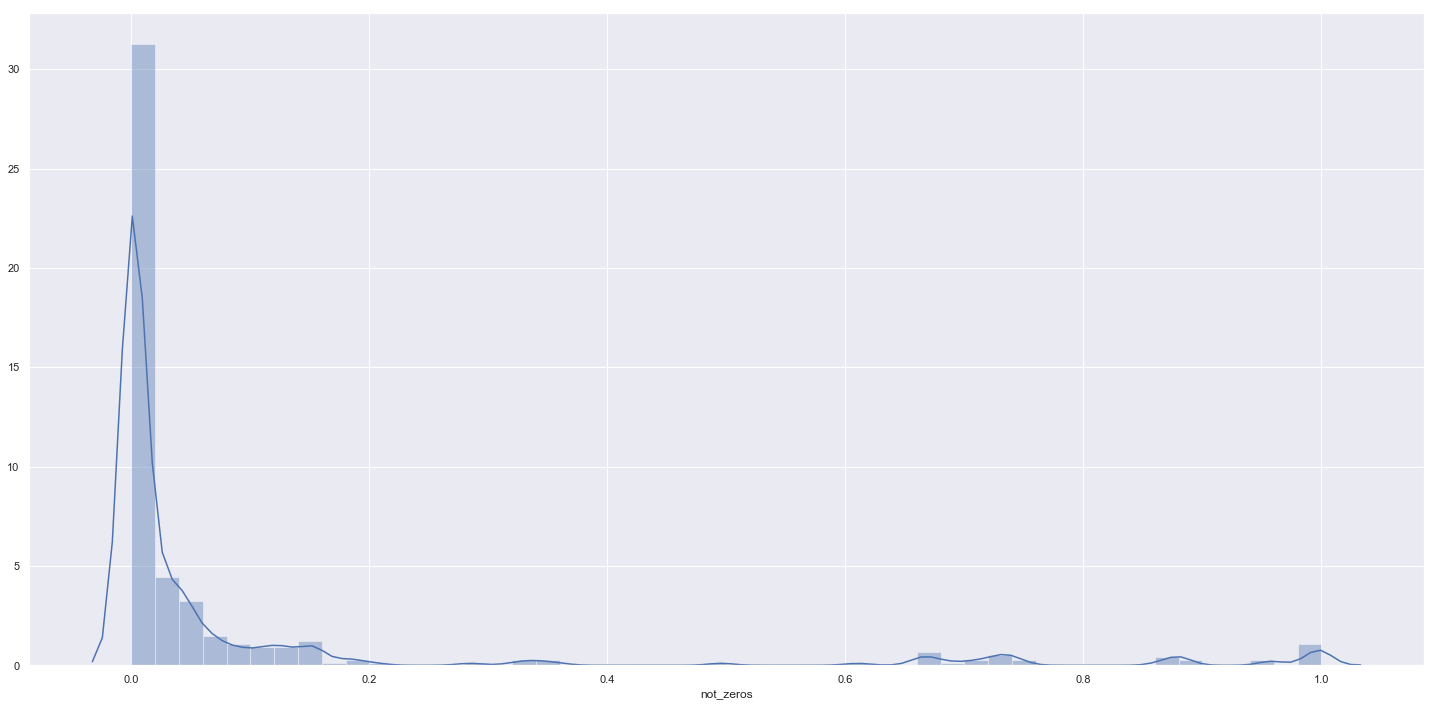

In [13]:
sns.distplot( m["not_zeros"] )

In [14]:
m[m.not_zeros<= 0.005].reset_index(drop=True)

,attributes,unique_values,not_zeros,min,max,range,mean,median,std,skew,kurtosis
0,imp_op_var40_comer_ult1,293.0,0.003881,0.00,8.237820e+03,8.237820e+03,3.559130e+00,0.0,9.315514e+01,45.834548,2787.680470
1,imp_op_var40_comer_ult3,346.0,0.004578,0.00,1.107357e+04,1.107357e+04,6.472698e+00,0.0,1.537361e+02,38.671915,1882.959156
2,imp_op_var40_efect_ult1,23.0,0.000500,0.00,6.600000e+03,6.600000e+03,4.129463e-01,0.0,3.060466e+01,149.528499,29338.737209
3,imp_op_var40_efect_ult3,29.0,0.000592,0.00,6.600000e+03,6.600000e+03,5.673524e-01,0.0,3.651327e+01,112.951439,16749.323308
4,imp_op_var40_ult1,224.0,0.003012,0.00,8.237820e+03,8.237820e+03,3.160715e+00,0.0,9.526758e+01,52.578032,3427.778365
5,imp_sal_var16_ult1,66.0,0.001263,0.00,1.050000e+05,1.050000e+05,5.477676e+00,0.0,4.653881e+02,181.054616,37489.417947
6,ind_var1,2.0,0.003762,0.00,1.000000e+00,1.000000e+00,3.762168e-03,0.0,6.122103e-02,16.211673,260.825206
7,ind_var2_0,1.0,0.000000,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000
8,ind_var2,1.0,0.000000,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000
9,ind_var6_0,2.0,0.000105,0.00,1.000000e+00,1.000000e+00,1.052355e-04,0.0,1.025789e-02,97.467302,9498.124885


In [15]:
#para limpar um pouco o dataset, resolvemos excluir das analises as colunas com mais de 99,5% de valores iguais a 0, 
#pois decidimos que essas trariam pouco valor à predição
weak_columns = m[m.not_zeros<= 0.005].attributes

In [16]:
df1 = df1.drop(list(weak_columns), axis=1)

In [17]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,76020.0,7.596405e+04,4.378195e+04,1.00,38104.7500,76043.00,113748.7500,1.518380e+05
var3,76020.0,-1.523199e+03,3.903346e+04,-999999.00,2.0000,2.00,2.0000,2.380000e+02
var15,76020.0,3.321287e+01,1.295649e+01,5.00,23.0000,28.00,40.0000,1.050000e+02
imp_ent_var16_ult1,76020.0,8.620827e+01,1.614757e+03,0.00,0.0000,0.00,0.0000,2.100000e+05
imp_op_var39_comer_ult1,76020.0,7.236307e+01,3.393158e+02,0.00,0.0000,0.00,0.0000,1.288803e+04
imp_op_var39_comer_ult3,76020.0,1.195296e+02,5.462663e+02,0.00,0.0000,0.00,0.0000,2.102481e+04
imp_op_var41_comer_ult1,76020.0,6.880394e+01,3.196055e+02,0.00,0.0000,0.00,0.0000,1.288803e+04
imp_op_var41_comer_ult3,76020.0,1.130569e+02,5.121548e+02,0.00,0.0000,0.00,0.0000,1.656681e+04
imp_op_var41_efect_ult1,76020.0,6.820514e+01,5.318979e+02,0.00,0.0000,0.00,0.0000,4.599000e+04
imp_op_var41_efect_ult3,76020.0,1.132251e+02,9.500864e+02,0.00,0.0000,0.00,0.0000,1.311000e+05


In [18]:
df1.head(10)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,ind_var1_0,ind_var5_0,ind_var5,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13,ind_var14_0,ind_var14,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var30_0,ind_var30,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var41_0,num_var1_0,num_var4,num_var5_0,num_var5,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13,num_var14_0,num_var14,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var30_0,num_var30,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var41_0,num_var42_0,num_var42,saldo_var5,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13,saldo_var14,saldo_var24,saldo_var26,saldo_var25,saldo_var30,saldo_var37,saldo_var42,var36,delta_imp_aport_var13_1y3,delta_num_aport_var13_1y3,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_aport_var13_hace3,num_aport_var13_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_med_var45_ult3,num_meses_var5_ult3,num_meses_var8_ult3,num_meses_var12_ult3,num_meses_var13_corto_ult3,num_meses_var13_largo_ult3,num_meses_var39_vig_ult3,num_op_var39_comer_ult1,num_op_var39_comer_ult3,num_op_var41_comer_ult1,num_op_var41_comer_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,3,0,3,3,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,99,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,3,0,0,0,0,0,3,3,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,3,3,0,0,0,3,0,3,3,0,0.00,0.0,0.0,300.0,0.0,300.0,0.0,0.0,0.0,0.0,300.00,0.00,0.00,3,-1.0,-1.0,300.0,0.0,0.0,0.0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,88.89,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,0,0,0,3,0,3,3,3,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.00,0.00,3.00,99,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.00,0.18,3.00,2.

In [19]:
ct1 = pd.DataFrame(df1.apply(np.mean)).T
ct2 = pd.DataFrame(df1.apply(np.median)).T

# Dispersion - std, max, min, range, skew, kurtosis
d1 = pd.DataFrame(df1.apply(np.std)).T
d2 = pd.DataFrame(df1.apply(min)).T
d3 = pd.DataFrame(df1.apply(max)).T
d4 = pd.DataFrame(df1.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(df1.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(df1.apply(lambda x: x.kurtosis())).T

#concatenete
n = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
n.columns = ["attributes", "min", "max", "range", "mean", "median", "std", "skew", "kurtosis"]

n

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,ID,1.00,1.518380e+05,1.518370e+05,7.596405e+04,76043.00,4.378166e+04,-0.001998,-1.197633
1,var3,-999999.00,2.380000e+02,1.000237e+06,-1.523199e+03,2.00,3.903321e+04,-25.541574,650.389135
2,var15,5.00,1.050000e+02,1.000000e+02,3.321287e+01,28.00,1.295640e+01,1.578367,2.519919
3,imp_ent_var16_ult1,0.00,2.100000e+05,2.100000e+05,8.620827e+01,0.00,1.614747e+03,67.267512,6321.435132
4,imp_op_var39_comer_ult1,0.00,1.288803e+04,1.288803e+04,7.236307e+01,0.00,3.393136e+02,9.454298,145.398198
5,imp_op_var39_comer_ult3,0.00,2.102481e+04,2.102481e+04,1.195296e+02,0.00,5.462627e+02,9.735351,155.618112
6,imp_op_var41_comer_ult1,0.00,1.288803e+04,1.288803e+04,6.880394e+01,0.00,3.196034e+02,9.226000,143.022438
7,imp_op_var41_comer_ult3,0.00,1.656681e+04,1.656681e+04,1.130569e+02,0.00,5.121515e+02,9.546986,149.240681
8,imp_op_var41_efect_ult1,0.00,4.599000e+04,4.599000e+04,6.820514e+01,0.00,5.318944e+02,36.667400,2347.125582
9,imp_op_var41_efect_ult3,0.00,1.311000e+05,1.311000e+05,1.132251e+02,0.00,9.500801e+02,61.994858,6716.076163


In [20]:
binary_columns = (df1.apply(lambda x: x.unique().shape[0]) <= 2)

In [21]:
sum(df1.apply(lambda x: x.unique().shape[0]) == 2)

39

In [22]:
binary_attributes = df1.loc[:, binary_columns]

In [23]:
binary_attributes.head().append(binary_attributes.tail())

,ind_var1_0,ind_var5_0,ind_var5,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13,ind_var14_0,ind_var14,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var30_0,ind_var30,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var41_0,num_var8,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,TARGET
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,1,1,1,1,0,0,0
4,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0
76015,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
76016,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
76017,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
76018,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
76019,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [24]:
binary_attributes.shape

(76020, 39)

In [25]:
nonbinary_attributes = df1.loc[:, ~binary_columns]

In [26]:
nonbinary_attributes.head().append(nonbinary_attributes.tail())

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,num_var1_0,num_var4,num_var5_0,num_var5,num_var8_0,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13,num_var14_0,num_var14,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var30_0,num_var30,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var41_0,num_var42_0,num_var42,saldo_var5,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13,saldo_var14,saldo_var24,saldo_var26,saldo_var25,saldo_var30,saldo_var37,saldo_var42,var36,delta_imp_aport_var13_1y3,delta_num_aport_var13_1y3,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,var21,num_aport_var13_hace3,num_aport_var13_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_med_var45_ult3,num_meses_var5_ult3,num_meses_var8_ult3,num_meses_var12_ult3,num_meses_var13_corto_ult3,num_meses_var13_largo_ult3,num_meses_var39_vig_ult3,num_op_var39_comer_ult1,num_op_var39_comer_ult3,num_op_var41_comer_ult1,num_op_var41_comer_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,3,0,3,3,0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,99,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,3,0,0,0,0,3,3,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,3,3,0,0,0,3,0,3,3,0,0.00,0.0,0.00,300.0,0.0,300.0,0.0,0.00,0.0,0.0,300.00,0.00,0.00,3,-1.0,-1.0,300.0,0.0,0.0,0.0,0,3,0,0,0,0,0,0,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,88.89,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,0,0,0,3,0,3,3,3,3.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,3.00,0.00,3.00,99,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.00,0.18,3.00,2.07,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,9,0,0,9,9,3,3,9,6,6,6,3,0,3,3,3,70.62,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,70.62,34.95,70.62,2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3,0,0,3,0,15,2,0,0,0,0,1,9,9,9,9,0,0,0,0,0,0,0,27,3,18,48,186.09,0.00,91.56,138.84,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,3,0,0,3,3,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,6,3,3,0,0,0,3,0,3,6,3,0.00,0.0,135003.00,0.0,0.0,0.0,0.0,135003.00,0.0,0.0,135003.00,0.00,135003.00,1,0.0,0.0,0.0,0.0,135003

In [27]:
nonbinary_attributes.shape

(76020, 125)

In [153]:
nonbinary_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,76020.0,7.596405e+04,4.378195e+04,1.00,38104.7500,76043.00,113748.7500,1.518380e+05
var3,76020.0,-1.523199e+03,3.903346e+04,-999999.00,2.0000,2.00,2.0000,2.380000e+02
var15,76020.0,3.321287e+01,1.295649e+01,5.00,23.0000,28.00,40.0000,1.050000e+02
imp_ent_var16_ult1,76020.0,8.620827e+01,1.614757e+03,0.00,0.0000,0.00,0.0000,2.100000e+05
imp_op_var39_comer_ult1,76020.0,7.236307e+01,3.393158e+02,0.00,0.0000,0.00,0.0000,1.288803e+04
imp_op_var39_comer_ult3,76020.0,1.195296e+02,5.462663e+02,0.00,0.0000,0.00,0.0000,2.102481e+04
imp_op_var41_comer_ult1,76020.0,6.880394e+01,3.196055e+02,0.00,0.0000,0.00,0.0000,1.288803e+04
imp_op_var41_comer_ult3,76020.0,1.130569e+02,5.121548e+02,0.00,0.0000,0.00,0.0000,1.656681e+04
imp_op_var41_efect_ult1,76020.0,6.820514e+01,5.318979e+02,0.00,0.0000,0.00,0.0000,4.599000e+04
imp_op_var41_efect_ult3,76020.0,1.132251e+02,9.500864e+02,0.00,0.0000,0.00,0.0000,1.311000e+05


In [28]:
df1.groupby('TARGET').size()

TARGET
0    73012
1     3008
dtype: int64

# 2.0 FEATURE SELECTION

In [29]:
df2 = df1.copy()

In [30]:
df2.shape

(76020, 164)

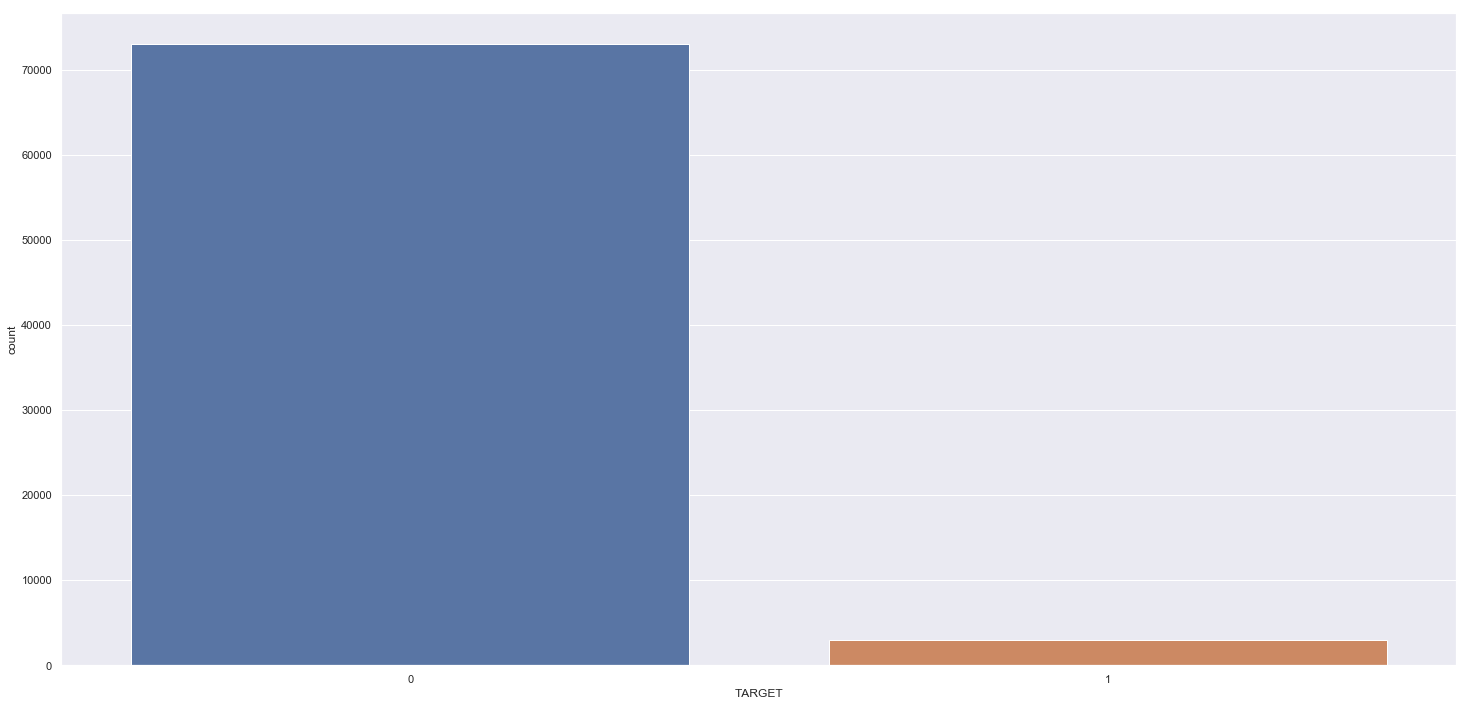

In [31]:
sns.countplot(df2["TARGET"])

## 2.1 - RFE

In [32]:
X = df2.iloc[:,1:-1]
Y = df2.iloc[:,-1]

In [70]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.3,random_state=42)

In [34]:
np.bincount(Y_treino)

array([51121,  2093], dtype=int64)

In [35]:
print(X_treino.shape)
print(X_teste.shape)

(53214, 162)
(22806, 162)


In [36]:
#Nossos dados estão muito desbalanceados, o que atrapalha na hora de rodar nossos modelos preditivos, 
#vamos balanceá-los para buscar uma melhora no resultado
smt = SMOTE()
X_treino_res, Y_treino_res = smt.fit_resample(X_treino, Y_treino)

In [37]:
np.bincount(Y_treino_res)

array([51121, 51121], dtype=int64)

In [38]:
## RFE
#rfe_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
#rfe = RFE(rfe_model, n_features_to_select=15)
#fit = rfe.fit(X_treino_res, Y_treino_res)

In [39]:
#rfe.ranking_

In [40]:
#X_treino_res.loc[:,rfe.support_].columns

In [41]:
#colunas escolhidas pelo modelo de RFE 
RFE_columns = ['var15', 'imp_op_var41_efect_ult3', 'ind_var5', 'ind_var30', 'num_var5',
       'num_var30', 'num_var35', 'saldo_var5', 'saldo_var30', 'num_var22_ult3',
       'num_meses_var5_ult3', 'num_var45_ult3', 'saldo_medio_var5_hace3',
       'saldo_medio_var5_ult3', 'var38']

In [71]:
X_treino_rfe = X_treino_res.loc[:,RFE_columns]
X_teste_rfe = X_teste.loc[:,RFE_columns]

In [43]:
modelo = RandomForestClassifier(n_estimators=100,criterion = 'entropy', random_state = 42, n_jobs=-1)

# Treinando o modelo com dados de treino 
modelo.fit(X_treino_rfe, Y_treino_res)

# Previsões
valores_previstos = modelo.predict(X_teste_rfe)

In [44]:
cm = confusion_matrix(Y_teste, valores_previstos)
report = classification_report(Y_teste, valores_previstos)
print(cm)
print(report)
accuracy_score(Y_teste, valores_previstos)

[[20441  1450]
 [  645   270]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     21891
           1       0.16      0.30      0.20       915

    accuracy                           0.91     22806
   macro avg       0.56      0.61      0.58     22806
weighted avg       0.94      0.91      0.92     22806



0.9081382092431817

## 2.2 - PCA

In [58]:
X = df2.iloc[:,1:-1]
Y = df2.iloc[:,-1]

In [59]:
# Normalizando os dados
scaler = RobustScaler()
rescaledX = scaler.fit_transform(X)

# Seleção de atributos
pca = PCA(n_components = 30)
df_pca = pca.fit_transform(rescaledX)

In [60]:
X_pca = pd.DataFrame(df_pca)

In [61]:
X_pca.shape

(76020, 30)

In [62]:
X_treino_pca, X_teste_pca, Y_treino_pca, Y_teste_pca = train_test_split(X_pca, Y, test_size = 0.3,random_state=42)

In [63]:
np.bincount(Y_treino)

array([51121,  2093], dtype=int64)

In [64]:
smt = SMOTE()
X_treino_pca_res, Y_treino_pca_res = smt.fit_resample(X_treino_pca, Y_treino_pca)

In [66]:
np.bincount(Y_treino_pca_res)

array([51121, 51121], dtype=int64)

In [67]:
modelo = RandomForestClassifier(n_estimators=100,criterion = 'entropy', random_state = 42, n_jobs=-1)

# Treinando o modelo com dados de treino 
modelo.fit(X_treino_pca_res, Y_treino_pca_res)

# Previsões
valores_previstos = modelo.predict(X_teste_pca)

In [68]:
cm = confusion_matrix(Y_teste_pca, valores_previstos)
report = classification_report(Y_teste_pca, valores_previstos)
print(cm)
print(report)
accuracy_score(Y_teste_pca, valores_previstos)

[[20119  1772]
 [  678   237]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     21891
           1       0.12      0.26      0.16       915

    accuracy                           0.89     22806
   macro avg       0.54      0.59      0.55     22806
weighted avg       0.93      0.89      0.91     22806



0.892572130141191

## 2.3 - PCA & RFE

In [57]:
def run_randomForest(x_train, x_test, y_train, y_test,n_estimators):
    modelo = RandomForestClassifier(n_estimators=n_estimators,criterion = 'entropy', random_state = 42, n_jobs=-1)
    modelo.fit(x_train, y_train)
    y_pred = modelo.predict(x_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [56]:
#for i in range(1,30):
    #rfe_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    #rfe = RFE(rfe_model, n_features_to_select=i)
    #fit = rfe.fit(X_treino_pca_res, Y_treino_pca_res)
    #X_treino_rfe = rfe.transform(X_treino_pca_res)
    #X_teste_rfe = rfe.transform(X_teste_pca)
    #print('Index: ', i)
    #run_randomForest(X_treino_rfe, X_teste_rfe, Y_treino_pca_res, Y_teste_pca,100)
    #print()

# 3.0 MODELO FINAL

## RandomForest

In [76]:
#o modelo usando apenas as colunas escolhidas no RFE mostrou melhor performance dentre os testados,
#vamos agora testar o melhor numero de n_estimators no RandomForest para os dados
for i in range(500,4000,500):
    print('n_estimators: ', i)
    run_randomForest(X_treino_rfe, X_teste_rfe, Y_treino_res, Y_teste,i)
    print()

n_estimators:  500
Accuracy:  0.9083136016837674

n_estimators:  1000
Accuracy:  0.908182057353328

n_estimators:  1500
Accuracy:  0.9081382092431817

n_estimators:  2000
Accuracy:  0.9080943611330352

n_estimators:  2500
Accuracy:  0.9083574497939139

n_estimators:  3000
Accuracy:  0.908182057353328

n_estimators:  3500
Accuracy:  0.908182057353328



In [84]:
#n_estimators=2500 mostrou ter o melhor resultado dentre os testados
modelo_final = RandomForestClassifier(n_estimators=2500,criterion = 'entropy', random_state = 42, n_jobs=-1)

# Treinando o modelo com dados de treino 
modelo_final.fit(X_treino_rfe, Y_treino_res)

# Previsões
valores_previstos = modelo_final.predict(X_teste_rfe)

In [85]:
cm = confusion_matrix(Y_teste, valores_previstos)
report = classification_report(Y_teste, valores_previstos)
print(cm)
print(report)
accuracy_score(Y_teste, valores_previstos)

[[20448  1443]
 [  647   268]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     21891
           1       0.16      0.29      0.20       915

    accuracy                           0.91     22806
   macro avg       0.56      0.61      0.58     22806
weighted avg       0.94      0.91      0.92     22806



0.9083574497939139

In [87]:
#salvando o modelo
pickle.dump(modelo_final, open (r"model\model_rossmann.pkl",'wb'))

## Predições

In [145]:
#criando uma função para predizer novas informações baseada 
def get_predictions(data):
    RFE_columns = ['var15', 'imp_op_var41_efect_ult3', 'ind_var5', 'ind_var30', 'num_var5',
       'num_var30', 'num_var35', 'saldo_var5', 'saldo_var30', 'num_var22_ult3',
       'num_meses_var5_ult3', 'num_var45_ult3', 'saldo_medio_var5_hace3',
       'saldo_medio_var5_ult3', 'var38']
    data_rfe = data.loc[:,RFE_columns]
    y_pred = modelo.predict(data_rfe)
    df_pred = pd.DataFrame(y_pred,columns=['previsoes'])
    sample_data = teste[['ID']]
    sample_data['pred_TARGET'] = df_pred['previsoes']
    return sample_data

In [146]:
a = get_predictions(teste)

In [149]:
a.head().append(a.tail())

,ID,pred_TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,0
75817,151837,0
